# Example notebook illusrtating the usage of the compartmental.Model class
## Nazmi Burak Budanur (IST Austria)
### February 9, 2021 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import compartmental
from scipy.integrate import odeint
from IPython.display import display, Math
from scipy.optimize import curve_fit

In [2]:
# Generate a model

compartments = [
    ('S'    , {"layer" : 1}),    # Susceptible
    ('I'    , {"layer" : 2}),    # Infectious
    ('R'    , {"layer" : 3}),    # Removed (recovered/dead)
]

parameters = {
    'beta' : 0.6,     # avg cont. / pers. / day * prob(trans.)
    'gamma': 0.2,    # (days)^-1 Inverse mean infectious period  
    'N'    : 1e6,        # population
}

rates = [
    ('S', 'I', {"label" : "beta * S * I / N"}), 
    ('I', 'R', {"label" : "gamma * I"})
]

model = compartmental.Model()
model.set_compartments(compartments)
model.set_rates(rates)
model.set_parameters(list(parameters.keys()))

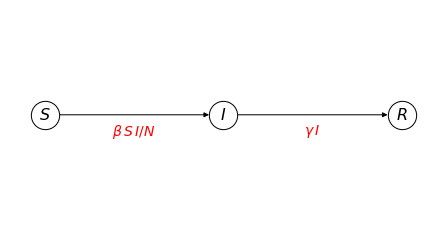

In [3]:
fig = model.visualize(figsize=(6,3))

In [4]:
ode_latex, ode_symbolic, ode = model.generate_ode()
display(Math(ode_latex))

<IPython.core.display.Math object>

In [5]:
# Run an epidemic simulation with 
# N = 1e6, gamma = 1/5 (days^-1), beta = 0.6 
# i.e. R_0 = beta / gamma = 3 ~ covid-19

initial_population = {'S': 1e6 - 100, 
                      'I': 100, 
                      'R': 0,}

simulation_time = np.arange(0, 365)

population = odeint(ode, 
                    list(initial_population.values()), 
                    simulation_time, 
                    args = (list(parameters.values()),))

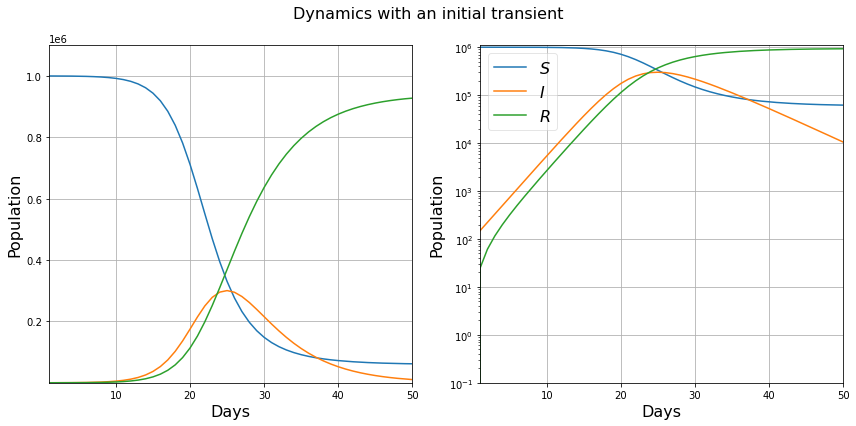

In [6]:
fig = plt.figure(figsize=(12,6))
axes = fig.subplots(1,2)

for ax in axes:
    model.plot_compartment(simulation_time, population, 'S', ax=ax)
    model.plot_compartment(simulation_time, population, 'I', ax=ax)
    model.plot_compartment(simulation_time, population, 'R', ax=ax)

    ax.set_xlim(1, 50)
    ax.set_ylim(1e-1, 1.1e6)
    ax.grid(True)
    ax.set_xlabel('Days', fontsize=16)
    ax.set_ylabel('Population', fontsize=16)

axes[0
].get_legend().remove()
axes[1].set_yscale('log')
fig.suptitle('Dynamics with an initial transient', fontsize=16)
plt.tight_layout()

In [7]:
initial_population_exp = model.initiate_exponential(
    initial_population, parameters, np.arange(0, 10), ['R'], 'S'
    )

In [8]:
# Run an epidemic simulation with 
# N = 1e6, gamma = 1/5 (days^-1), beta = 0.6 
# i.e. R_0 = beta / gamma = 3 ~ covid-19

simulation_time = np.arange(0, 365)

population = odeint(ode, 
                    list(initial_population_exp.values()), 
                    simulation_time, 
                    args = (list(parameters.values()),))

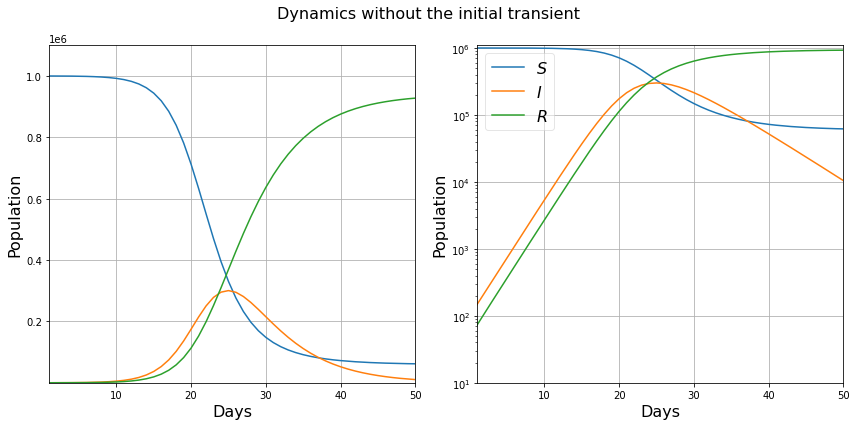

In [9]:
fig = plt.figure(figsize=(12,6))
axes = fig.subplots(1,2)

for ax in axes:
    model.plot_compartment(simulation_time, population, 'S', ax=ax)
    model.plot_compartment(simulation_time, population, 'I', ax=ax)
    model.plot_compartment(simulation_time, population, 'R', ax=ax)

    ax.set_xlim(1, 50)
    ax.set_ylim(10, 1.1e6)
    ax.grid(True)
    ax.set_xlabel('Days', fontsize=16)
    ax.set_ylabel('Population', fontsize=16)

axes[0
].get_legend().remove()
axes[1].set_yscale('log')
fig.suptitle('Dynamics without the initial transient', fontsize=16)

plt.tight_layout()